## Task 1.3.2 (Supervised Learning) - Predicting Adoption Speed For Cats and Dogs Separately
3.2 **Train specialized models for cats and dogs**: train with cat/dog instances and check whether the classification performance changes when Predicting Adoption and Predicting AdoptionSpeed.

In [1]:
import numpy as np
import scipy as sp
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib
import seaborn as sns
import pandas_profiling
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn import metrics
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.decomposition import PCA
from sklearn.naive_bayes import MultinomialNB
from xgboost import XGBClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.gaussian_process import GaussianProcessClassifier
import itertools
from nltk import NaiveBayesClassifier
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer, HashingVectorizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import PassiveAggressiveClassifier, SGDClassifier
from sklearn.svm import LinearSVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import BernoulliNB
from sklearn.model_selection import GridSearchCV
from sklearn import metrics
import matplotlib.pyplot as plt
import warnings
from sklearn.neighbors import KNeighborsClassifier
from textblob import TextBlob
from sklearn.ensemble import AdaBoostClassifier , VotingClassifier
from sklearn import preprocessing
from sklearn import tree
import warnings
import pydot
from imblearn.over_sampling import RandomOverSampler
from imblearn.over_sampling import SMOTE,ADASYN,SMOTENC
from collections import Counter
import random
from IPython.display import HTML, display
%matplotlib inline
warnings.filterwarnings('ignore')

## Read the preprocessed dataset

In [2]:
PetFinder_dataset = pd.read_csv("PetFinder_dataset_pp.csv")

In [3]:
MultiClassClassification = PetFinder_dataset.drop(['Adopted','InitialAdoptionSpeed','AgeBin','FeeBin','PhotoAmtBin','PolarityBin','DescwordsBin','SubjectivityBin'],axis=1).copy(deep=True)

In [4]:
MultiClassClassification.head(20)

,Type,Age,Gender,MaturitySize,FurLength,Vaccinated,Dewormed,Sterilized,Health,Quantity,Fee,State,PhotoAmt,Hasname,Breed,Color,Polarity,Subjectivity,DescWords,AdoptionSpeed
0,Cat,3,Male,Small,Short,No,No,No,Healthy,1,100,Selangor,1.0,1,Purebreed,BlackOther,0.130357,0.407143,69,instant adoption
1,Cat,1,Male,Medium,Medium,Not Sure,Not Sure,Not Sure,Healthy,1,0,Kuala Lumpur,2.0,0,Domestic,BlackOther,0.100000,0.400000,23,instant adoption
2,Dog,1,Male,Medium,Medium,Yes,Yes,No,Healthy,1,0,Selangor,7.0,1,Mixed Breed,BrownOther,0.261905,0.542857,69,delayed adoption
3,Dog,4,Female,Medium,Short,Yes,Yes,No,Healthy,1,150,Kuala Lumpur,8.0,1,Mixed Breed,BlackOther,0.341146,0.437500,25,instant adoption
4,Dog,1,Male,Medium,Short,No,No,No,Healthy,1,0,Selangor,3.0,1,Mixed Breed,Black,0.400000,0.743750,81,instant adoption
5,Cat,3,Female,Medium,Short,No,No,No,Healthy,1,0,Selangor,2.0,0,Domestic,CreamOther,0.000000,0.000000,18,instant adoption
6,Cat,12,Male,Medium,Long,No,No,Not Sure,Healthy,1,300,Selangor,3.0,1,Domestic,Black,0.250000,0.390000,78,instant adoption
7,Cat,2,Female,Medium,Medium,No,No,No,Healthy,1,0,Selangor,6.0,0,Domestic,Gray,0.038889,0.662963,13,instant adoption
8,Cat,12,Female,Medium,Medium,Not Sure,Not Sure,Not Sure,Healthy,1,0,Selangor,2.0,1,Domestic,BlackOther,0.213750,0.511250,45,very late adoption
9,Dog,2,Male,Medium,Short,No,Yes,No,Healthy,1,0,Kuala Lumpur,7.0,1,Mixed Breed,BlackOther,0.138889,0.455556,12,instant adoption


In [5]:
MultiClassClassification.shape

(12987, 20)

### Converted 5 class Problem to 3 class by binning and Performed Data Analysis against the target variable

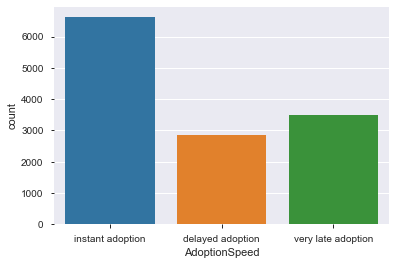

In [6]:
sns.countplot(x=MultiClassClassification['AdoptionSpeed'])
plt.show()

In [7]:
MultiClassClassification['AdoptionSpeed'].value_counts()

instant adoption      6620
very late adoption    3508
delayed adoption      2859
Name: AdoptionSpeed, dtype: int64

In [8]:
n=min(MultiClassClassification['AdoptionSpeed'].value_counts())
sample_instant = MultiClassClassification.ix[MultiClassClassification.AdoptionSpeed == 'instant adoption'].sample(n=n, replace=True, random_state=None)
sample_delayed = MultiClassClassification.ix[MultiClassClassification.AdoptionSpeed == 'delayed adoption'].sample(n=n, replace=True, random_state=None)
sample_late = MultiClassClassification.ix[MultiClassClassification.AdoptionSpeed == 'very late adoption'].sample(n=n, replace=True, random_state=None)

MultiClassClassification = pd.concat([sample_instant, sample_delayed ,sample_late])
labels=['instant adoption', 'delayed adoption' ,'very late adoption']

In [9]:
MultiClassClassification.isna().sum()

Type             0
Age              0
Gender           0
MaturitySize     0
FurLength        0
Vaccinated       0
Dewormed         0
Sterilized       0
Health           0
Quantity         0
Fee              0
State            0
PhotoAmt         0
Hasname          0
Breed            0
Color            0
Polarity         0
Subjectivity     0
DescWords        0
AdoptionSpeed    0
dtype: int64

In [10]:
mm_scaler = preprocessing.MinMaxScaler()
MultiClassClassification[['Age','Quantity' , 'Fee' , 'PhotoAmt','DescWords']] = mm_scaler.fit_transform(MultiClassClassification[['Age','Quantity' , 'Fee' , 'PhotoAmt','DescWords']])

In [11]:
MultiClassClassification.head(3)

,Type,Age,Gender,MaturitySize,FurLength,Vaccinated,Dewormed,Sterilized,Health,Quantity,Fee,State,PhotoAmt,Hasname,Breed,Color,Polarity,Subjectivity,DescWords,AdoptionSpeed
7617,Cat,0.015686,Female,Medium,Medium,No,No,No,Healthy,0.0,0.075,Terengganu,0.100000,1,Domestic,GoldenOther,0.044444,0.691667,0.030231,instant adoption
12354,Cat,0.015686,Female,Medium,Short,No,No,No,Healthy,1.0,0.000,Selangor,0.033333,0,Purebreed,YellowOther,0.364719,0.714935,0.023866,instant adoption
8187,Dog,0.011765,Male,Medium,Short,Not Sure,Yes,No,Healthy,0.0,0.000,Kuala Lumpur,0.200000,1,Mixed Breed,Cream,0.222500,0.500000,0.029435,instant adoption


In [12]:
grouped = MultiClassClassification.groupby('Type') 
cat = grouped.get_group('Cat') 
dog = grouped.get_group('Dog') 

y_cat = cat['AdoptionSpeed']
y_dog = dog['AdoptionSpeed']

In [13]:
cat.drop([ 'AdoptionSpeed'], axis=1 , inplace=True)
dog.drop([ 'AdoptionSpeed'], axis=1 , inplace=True)

In [14]:
#BinaryClassification.profile_report(style={'full_width':True})

In [15]:
one_hot = pd.get_dummies(cat)

In [16]:
one_hot

,Age,Quantity,Fee,PhotoAmt,Hasname,Polarity,Subjectivity,DescWords,Type_Cat,Gender_Female,...,Color_BrownOther,Color_Cream,Color_CreamOther,Color_Golden,Color_GoldenOther,Color_Gray,Color_GrayOther,Color_White,Color_Yellow,Color_YellowOther
7617,0.015686,0.0,0.075,0.100000,1,0.044444,0.691667,0.030231,1,1,...,0,0,0,0,1,0,0,0,0,0
12354,0.015686,1.0,0.000,0.033333,0,0.364719,0.714935,0.023866,1,1,...,0,0,0,0,0,0,0,0,0,1
12086,0.011765,0.0,0.000,0.133333,1,0.000000,0.000000,0.007955,1,0,...,0,0,0,0,0,0,0,0,0,1
4195,0.011765,0.0,0.000,0.066667,1,0.163021,0.545833,0.039777,1,1,...,0,0,0,0,0,0,1,0,0,0
11423,0.007843,1.0,0.000,0.066667,1,0.500000,1.000000,0.008751,1,0,...,0,0,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5531,0.027451,0.0,0.000,0.000000,1,0.194318,0.444102,0.062053,1,0,...,0,0,0,1,0,0,0,0,0,0
2357,0.141176,0.0,0.000,0.333333,1,0.029750,0.276833,0.065235,1,1,...,0,0,0,0,0,0,0,0,0,0
5810,0.043137,1.0,0.100,0.166667,1,0.002083,0.541667,0.023866,1,0,...,0,0,0,0,0,0,0,0,0,1
6726,0.011765,0.0,0.000,0.166667,1,0.024021,0.464044,0.085123,1,0,...,0,0,0,0,0,0,0,0,0,0


In [17]:
X_train, X_test, y_train, y_test = train_test_split(one_hot, y_cat, test_size=0.20, shuffle = True)

In [18]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    See full source and example: 
    http://scikit-learn.org/stable/auto_examples/model_selection/plot_confusion_matrix.html
    
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

## 1.2. Learning Classifiers

## Results on Cat Data

### Decision Tree Classifier

In [19]:
# Set the parameters by cross-validation
tuned_parameters = [{'criterion':['gini','entropy'],'max_leaf_nodes': [20,40,80]}]

scores = ['accuracy']

for score in scores:
    print("# Tuning hyper-parameters for %s" % score)
    print()

    clf_DTC = GridSearchCV(
        DecisionTreeClassifier(), tuned_parameters, cv=5, scoring='%s' % score)
    clf_DTC.fit(X_train, y_train)

    print("Best parameters set found on Train set:")
    print()
    print(clf_DTC.best_params_)
    print()
    print("Grid scores on Train set:")
    print()
    means = clf_DTC.cv_results_['mean_test_score']
    stds = clf_DTC.cv_results_['std_test_score']
    for mean, std, params in zip(means, stds, clf_DTC.cv_results_['params']):
        print("%0.3f (+/-%0.03f) for %r"
              % (mean, std * 2, params))
    print()

    print("Detailed classification report on Test Set:")
    pred = clf_DTC.predict(X_test)
    print(classification_report(y_test, pred,target_names=labels))
    print()

# Tuning hyper-parameters for accuracy

Best parameters set found on Train set:

{'criterion': 'gini', 'max_leaf_nodes': 80}

Grid scores on Train set:

0.493 (+/-0.024) for {'criterion': 'gini', 'max_leaf_nodes': 20}
0.491 (+/-0.035) for {'criterion': 'gini', 'max_leaf_nodes': 40}
0.507 (+/-0.023) for {'criterion': 'gini', 'max_leaf_nodes': 80}
0.490 (+/-0.024) for {'criterion': 'entropy', 'max_leaf_nodes': 20}
0.500 (+/-0.019) for {'criterion': 'entropy', 'max_leaf_nodes': 40}
0.506 (+/-0.013) for {'criterion': 'entropy', 'max_leaf_nodes': 80}

Detailed classification report on Test Set:
                    precision    recall  f1-score   support

  instant adoption       0.50      0.32      0.39       228
  delayed adoption       0.48      0.58      0.53       269
very late adoption       0.51      0.57      0.54       241

          accuracy                           0.50       738
         macro avg       0.50      0.49      0.49       738
      weighted avg       0.50      0.50  

In [20]:
clf_DTC = DecisionTreeClassifier(criterion='gini',max_leaf_nodes=80)
clf_DTC.fit(X_train, y_train)
dot_data = tree.export_graphviz(clf_DTC, out_file="clf_DTC.dot",
                                feature_names=one_hot.columns,
                                class_names=labels,
                                filled=True, rounded=True,
                                special_characters=True)
(clf_DTC_graph,) = pydot.graph_from_dot_file('clf_DTC.dot')
clf_DTC_graph.write_png('clf_DTC.png')
display(HTML('<img src="clf_DTC.png?%d" alt="clf_DTC.png" height="100">' % random.randint(0,2e9)))

In [21]:
scores = cross_val_score(clf_DTC, X_train, y_train, cv=5)

In [22]:
print("Accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))

Accuracy: 0.51 (+/- 0.02)


In [23]:
pred = clf_DTC.predict(X_test)
#generate classification report
print(classification_report(y_test, pred, target_names=labels))

                    precision    recall  f1-score   support

  instant adoption       0.50      0.32      0.39       228
  delayed adoption       0.48      0.58      0.53       269
very late adoption       0.51      0.57      0.54       241

          accuracy                           0.50       738
         macro avg       0.50      0.49      0.49       738
      weighted avg       0.50      0.50      0.49       738



Confusion matrix, without normalization


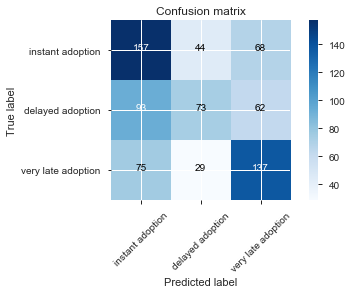

In [24]:
cm = metrics.confusion_matrix(y_test, pred, labels=labels)
plot_confusion_matrix(cm, classes=labels)

### Linear SVM

In [25]:
# Set the parameters by cross-validation
tuned_parameters = [{'loss':['hinge','squared_hinge'],'alpha': 10.0**-np.arange(1,7),'penalty':['l2','l1']}]

scores = ['accuracy']

for score in scores:
    print("# Tuning hyper-parameters for %s" % score)
    print()

    sgd_clf = GridSearchCV(
        SGDClassifier(max_iter= np.ceil(10**6 / X_train.shape[0])), tuned_parameters, cv=5, scoring='%s' % score)
    sgd_clf.fit(X_train, y_train)

    print("Best parameters set found on Train set:")
    print()
    print(sgd_clf.best_params_)
    print()
    print("Grid scores on Train set:")
    print()
    means = sgd_clf.cv_results_['mean_test_score']
    stds = sgd_clf.cv_results_['std_test_score']
    for mean, std, params in zip(means, stds, sgd_clf.cv_results_['params']):
        print("%0.3f (+/-%0.03f) for %r"
              % (mean, std * 2, params))
    print()

    print("Detailed classification report on Test Set:")
    pred = sgd_clf.predict(X_test)
    print(classification_report(y_test, pred,target_names=labels))
    print()

# Tuning hyper-parameters for accuracy

Best parameters set found on Train set:

{'alpha': 0.001, 'loss': 'hinge', 'penalty': 'l1'}

Grid scores on Train set:

0.428 (+/-0.023) for {'alpha': 0.1, 'loss': 'hinge', 'penalty': 'l2'}
0.342 (+/-0.070) for {'alpha': 0.1, 'loss': 'hinge', 'penalty': 'l1'}
0.373 (+/-0.025) for {'alpha': 0.1, 'loss': 'squared_hinge', 'penalty': 'l2'}
0.392 (+/-0.055) for {'alpha': 0.1, 'loss': 'squared_hinge', 'penalty': 'l1'}
0.445 (+/-0.067) for {'alpha': 0.01, 'loss': 'hinge', 'penalty': 'l2'}
0.373 (+/-0.123) for {'alpha': 0.01, 'loss': 'hinge', 'penalty': 'l1'}
0.384 (+/-0.051) for {'alpha': 0.01, 'loss': 'squared_hinge', 'penalty': 'l2'}
0.413 (+/-0.048) for {'alpha': 0.01, 'loss': 'squared_hinge', 'penalty': 'l1'}
0.437 (+/-0.023) for {'alpha': 0.001, 'loss': 'hinge', 'penalty': 'l2'}
0.446 (+/-0.064) for {'alpha': 0.001, 'loss': 'hinge', 'penalty': 'l1'}
0.391 (+/-0.037) for {'alpha': 0.001, 'loss': 'squared_hinge', 'penalty': 'l2'}
0.422 (+/-0.032) for

Confusion matrix, without normalization


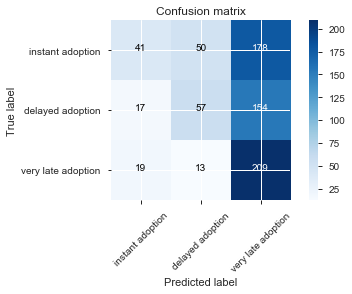

In [26]:
cm = metrics.confusion_matrix(y_test, pred, labels=labels)
plot_confusion_matrix(cm, classes=labels)

### Logistic Regression

In [27]:
# Set the parameters by cross-validation
tuned_parameters = [{'C': 10.0**np.arange(0,7),'penalty':['l2','l1'],'solver':['liblinear','lbfgs']}]

scores = ['accuracy']

for score in scores:
    print("# Tuning hyper-parameters for %s" % score)
    print()

    lr_clf = GridSearchCV(
        LogisticRegression(max_iter= np.ceil(10**6 / X_train.shape[0])), tuned_parameters, cv=5, scoring='%s' % score)
    lr_clf.fit(X_train, y_train)

    print("Best parameters set found on Train set:")
    print()
    print(lr_clf.best_params_)
    print()
    print("Grid scores on Train set:")
    print()
    means = lr_clf.cv_results_['mean_test_score']
    stds = lr_clf.cv_results_['std_test_score']
    for mean, std, params in zip(means, stds, lr_clf.cv_results_['params']):
        print("%0.3f (+/-%0.03f) for %r"
              % (mean, std * 2, params))
    print()

    print("Detailed classification report on Test Set:")
    pred = lr_clf.predict(X_test)
    print(classification_report(y_test, pred,target_names=labels))
    print()

# Tuning hyper-parameters for accuracy

Best parameters set found on Train set:

{'C': 10.0, 'penalty': 'l1', 'solver': 'liblinear'}

Grid scores on Train set:

0.455 (+/-0.023) for {'C': 1.0, 'penalty': 'l2', 'solver': 'liblinear'}
0.463 (+/-0.018) for {'C': 1.0, 'penalty': 'l2', 'solver': 'lbfgs'}
0.463 (+/-0.023) for {'C': 1.0, 'penalty': 'l1', 'solver': 'liblinear'}
nan (+/-nan) for {'C': 1.0, 'penalty': 'l1', 'solver': 'lbfgs'}
0.466 (+/-0.026) for {'C': 10.0, 'penalty': 'l2', 'solver': 'liblinear'}
0.467 (+/-0.022) for {'C': 10.0, 'penalty': 'l2', 'solver': 'lbfgs'}
0.468 (+/-0.028) for {'C': 10.0, 'penalty': 'l1', 'solver': 'liblinear'}
nan (+/-nan) for {'C': 10.0, 'penalty': 'l1', 'solver': 'lbfgs'}
0.466 (+/-0.028) for {'C': 100.0, 'penalty': 'l2', 'solver': 'liblinear'}
0.467 (+/-0.024) for {'C': 100.0, 'penalty': 'l2', 'solver': 'lbfgs'}
0.466 (+/-0.025) for {'C': 100.0, 'penalty': 'l1', 'solver': 'liblinear'}
nan (+/-nan) for {'C': 100.0, 'penalty': 'l1', 'solver': 'lbfgs'}

Confusion matrix, without normalization


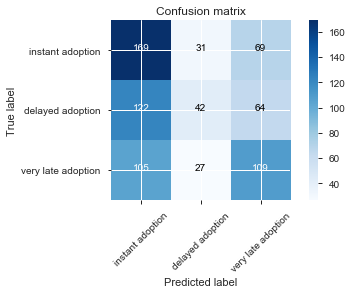

In [28]:
cm = metrics.confusion_matrix(y_test, pred, labels=labels)
plot_confusion_matrix(cm, classes=labels)

### Random Forest Classifier

In [29]:
# Set the parameters by cross-validation
tuned_parameters = [{'n_estimators': [400,500]}]

scores = ['accuracy']

for score in scores:
    print("# Tuning hyper-parameters for %s" % score)
    print()

    rf_clf = GridSearchCV(
        RandomForestClassifier(), tuned_parameters, cv=5, scoring='%s' % score)
    rf_clf.fit(X_train, y_train)

    print("Best parameters set found on Train set:")
    print()
    print(rf_clf.best_params_)
    print()
    print("Grid scores on Train set:")
    print()
    means = rf_clf.cv_results_['mean_test_score']
    stds = rf_clf.cv_results_['std_test_score']
    for mean, std, params in zip(means, stds, rf_clf.cv_results_['params']):
        print("%0.3f (+/-%0.03f) for %r"
              % (mean, std * 2, params))
    print()

    print("Detailed classification report on Test Set:")
    pred = rf_clf.predict(X_test)
    print(classification_report(y_test, pred,target_names=labels))
    print()

# Tuning hyper-parameters for accuracy

Best parameters set found on Train set:

{'n_estimators': 400}

Grid scores on Train set:

0.712 (+/-0.035) for {'n_estimators': 400}
0.710 (+/-0.027) for {'n_estimators': 500}

Detailed classification report on Test Set:
                    precision    recall  f1-score   support

  instant adoption       0.83      0.63      0.71       228
  delayed adoption       0.67      0.75      0.71       269
very late adoption       0.71      0.78      0.74       241

          accuracy                           0.72       738
         macro avg       0.74      0.72      0.72       738
      weighted avg       0.73      0.72      0.72       738




Confusion matrix, without normalization


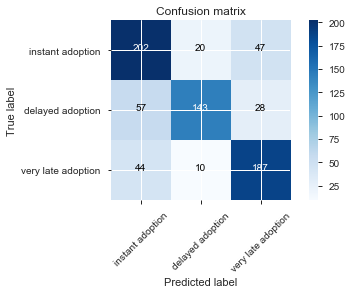

In [30]:
cm = metrics.confusion_matrix(y_test, pred, labels=labels)
plot_confusion_matrix(cm, classes=labels)

### KNN Classifier

In [31]:
# Set the parameters by cross-validation
tuned_parameters = [{'n_neighbors': [5,10,20],'weights':['uniform','distance']}]

scores = ['accuracy']

for score in scores:
    print("# Tuning hyper-parameters for %s" % score)
    print()

    knn_clf = GridSearchCV(
        KNeighborsClassifier(), tuned_parameters, cv=5, scoring='%s' % score)
    knn_clf.fit(X_train, y_train)

    print("Best parameters set found on Train set:")
    print()
    print(knn_clf.best_params_)
    print()
    print("Grid scores on Train set:")
    print()
    means = knn_clf.cv_results_['mean_test_score']
    stds = knn_clf.cv_results_['std_test_score']
    for mean, std, params in zip(means, stds, knn_clf.cv_results_['params']):
        print("%0.3f (+/-%0.03f) for %r"
              % (mean, std * 2, params))
    print()

    print("Detailed classification report on Test Set:")
    pred = knn_clf.predict(X_test)
    print(classification_report(y_test, pred,target_names=labels))
    print()

# Tuning hyper-parameters for accuracy

Best parameters set found on Train set:

{'n_neighbors': 20, 'weights': 'distance'}

Grid scores on Train set:

0.468 (+/-0.026) for {'n_neighbors': 5, 'weights': 'uniform'}
0.621 (+/-0.029) for {'n_neighbors': 5, 'weights': 'distance'}
0.451 (+/-0.014) for {'n_neighbors': 10, 'weights': 'uniform'}
0.631 (+/-0.025) for {'n_neighbors': 10, 'weights': 'distance'}
0.435 (+/-0.041) for {'n_neighbors': 20, 'weights': 'uniform'}
0.636 (+/-0.040) for {'n_neighbors': 20, 'weights': 'distance'}

Detailed classification report on Test Set:
                    precision    recall  f1-score   support

  instant adoption       0.69      0.65      0.67       228
  delayed adoption       0.65      0.71      0.68       269
very late adoption       0.73      0.70      0.71       241

          accuracy                           0.69       738
         macro avg       0.69      0.69      0.69       738
      weighted avg       0.69      0.69      0.69       738




Confusion matrix, without normalization


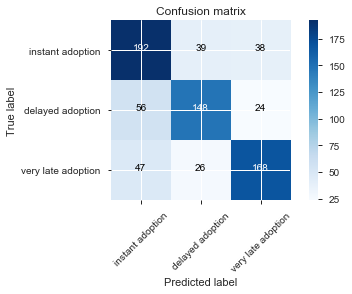

In [32]:
cm = metrics.confusion_matrix(y_test, pred, labels=labels)
plot_confusion_matrix(cm, classes=labels)

### Adaboost Classifier

In [33]:
ada_clf = AdaBoostClassifier(n_estimators=100, random_state=0)

In [34]:
ada_clf.fit(X_train, y_train)
scores = cross_val_score(ada_clf, X_train, y_train, cv=5)
print("Accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))

Accuracy: 0.49 (+/- 0.04)


In [35]:
pred = ada_clf.predict(X_test)
#generate classification report
print(classification_report(y_test, pred, target_names=labels))

                    precision    recall  f1-score   support

  instant adoption       0.45      0.25      0.32       228
  delayed adoption       0.49      0.58      0.53       269
very late adoption       0.50      0.60      0.55       241

          accuracy                           0.49       738
         macro avg       0.48      0.48      0.47       738
      weighted avg       0.48      0.49      0.47       738



Confusion matrix, without normalization


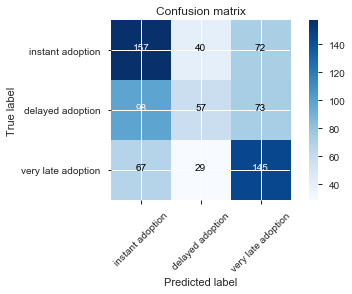

In [36]:
cm = metrics.confusion_matrix(y_test, pred, labels=labels)
plot_confusion_matrix(cm, classes=labels)

### Voting Classifier

In [37]:
eclf = VotingClassifier(estimators=[('onehot-clf1', clf_DTC), ('onehot-clf3', lr_clf) , ('onehot-clf4', rf_clf) , ('onehot-clf5', knn_clf) ,('onehot-clf6', ada_clf)], voting='soft')
eclf.fit(X_train, y_train)
for clf, label in zip([clf_DTC, lr_clf, rf_clf, knn_clf, ada_clf, eclf], ['DecisionTree', 'Logistic Regression', 'Random Forest', 'Knn', 'Adaboost','Voting']):
    scores = cross_val_score(clf, X_test, y_test, scoring='accuracy', cv=5)
    print("Accuracy: %0.2f (+/- %0.2f) [%s]" % (scores.mean(), scores.std(), label))

Accuracy: 0.42 (+/- 0.05) [DecisionTree]
Accuracy: 0.42 (+/- 0.04) [Logistic Regression]
Accuracy: 0.53 (+/- 0.06) [Random Forest]
Accuracy: 0.51 (+/- 0.05) [Knn]
Accuracy: 0.46 (+/- 0.04) [Adaboost]
Accuracy: 0.50 (+/- 0.04) [Voting]


Confusion matrix, without normalization


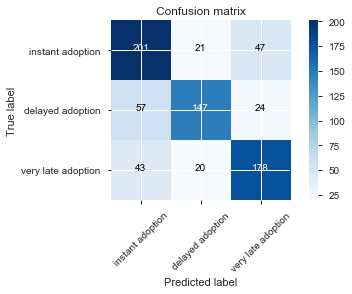

In [38]:
pred=eclf.predict(X_test)
cm = metrics.confusion_matrix(y_test, pred, labels=labels)
plot_confusion_matrix(cm, classes=labels)

## Results on Dog Group

In [39]:
one_hot = pd.get_dummies(dog)

In [40]:
X_train, X_test, y_train, y_test = train_test_split(one_hot, y_dog, test_size=0.20, shuffle = True)

### Decision Tree Classifier

In [41]:
# Set the parameters by cross-validation
tuned_parameters = [{'criterion':['gini','entropy'],'max_leaf_nodes': [20,40,80]}]

scores = ['accuracy']

for score in scores:
    print("# Tuning hyper-parameters for %s" % score)
    print()

    clf_DTC = GridSearchCV(
        DecisionTreeClassifier(), tuned_parameters, cv=5, scoring='%s' % score)
    clf_DTC.fit(X_train, y_train)

    print("Best parameters set found on Train set:")
    print()
    print(clf_DTC.best_params_)
    print()
    print("Grid scores on Train set:")
    print()
    means = clf_DTC.cv_results_['mean_test_score']
    stds = clf_DTC.cv_results_['std_test_score']
    for mean, std, params in zip(means, stds, clf_DTC.cv_results_['params']):
        print("%0.3f (+/-%0.03f) for %r"
              % (mean, std * 2, params))
    print()

    print("Detailed classification report on Test Set:")
    pred = clf_DTC.predict(X_test)
    print(classification_report(y_test, pred,target_names=labels))
    print()

# Tuning hyper-parameters for accuracy

Best parameters set found on Train set:

{'criterion': 'gini', 'max_leaf_nodes': 80}

Grid scores on Train set:

0.496 (+/-0.035) for {'criterion': 'gini', 'max_leaf_nodes': 20}
0.499 (+/-0.026) for {'criterion': 'gini', 'max_leaf_nodes': 40}
0.517 (+/-0.018) for {'criterion': 'gini', 'max_leaf_nodes': 80}
0.492 (+/-0.039) for {'criterion': 'entropy', 'max_leaf_nodes': 20}
0.493 (+/-0.038) for {'criterion': 'entropy', 'max_leaf_nodes': 40}
0.512 (+/-0.035) for {'criterion': 'entropy', 'max_leaf_nodes': 80}

Detailed classification report on Test Set:
                    precision    recall  f1-score   support

  instant adoption       0.49      0.57      0.53       350
  delayed adoption       0.52      0.45      0.48       291
very late adoption       0.64      0.61      0.62       338

          accuracy                           0.55       979
         macro avg       0.55      0.54      0.54       979
      weighted avg       0.55      0.55  

In [42]:
clf_DTC = DecisionTreeClassifier(criterion='gini',max_leaf_nodes=80)
clf_DTC.fit(X_train, y_train)
dot_data = tree.export_graphviz(clf_DTC, out_file="clf_DTC.dot",
                                feature_names=one_hot.columns,
                                class_names=labels,
                                filled=True, rounded=True,
                                special_characters=True)
(clf_DTC_graph,) = pydot.graph_from_dot_file('clf_DTC.dot')
clf_DTC_graph.write_png('clf_DTC.png')
display(HTML('<img src="clf_DTC.png?%d" alt="clf_DTC.png" height="100">' % random.randint(0,2e9)))

In [43]:
scores = cross_val_score(clf_DTC, X_train, y_train, cv=5)

In [44]:
print("Accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))

Accuracy: 0.52 (+/- 0.02)


In [45]:
pred = clf_DTC.predict(X_test)
#generate classification report
print(classification_report(y_test, pred, target_names=labels))

                    precision    recall  f1-score   support

  instant adoption       0.49      0.57      0.53       350
  delayed adoption       0.52      0.45      0.48       291
very late adoption       0.64      0.61      0.62       338

          accuracy                           0.55       979
         macro avg       0.55      0.54      0.54       979
      weighted avg       0.55      0.55      0.55       979



Confusion matrix, without normalization


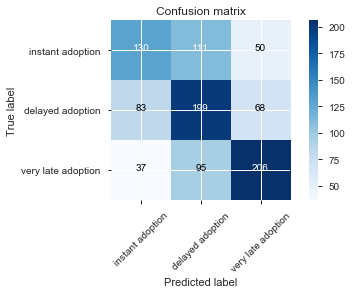

In [46]:
cm = metrics.confusion_matrix(y_test, pred, labels=labels)
plot_confusion_matrix(cm, classes=labels)

### Linear SVM

In [47]:
# Set the parameters by cross-validation
tuned_parameters = [{'loss':['hinge','squared_hinge'],'alpha': 10.0**-np.arange(1,7),'penalty':['l2','l1']}]

scores = ['accuracy']

for score in scores:
    print("# Tuning hyper-parameters for %s" % score)
    print()

    sgd_clf = GridSearchCV(
        SGDClassifier(max_iter= np.ceil(10**6 / X_train.shape[0])), tuned_parameters, cv=5, scoring='%s' % score)
    sgd_clf.fit(X_train, y_train)

    print("Best parameters set found on Train set:")
    print()
    print(sgd_clf.best_params_)
    print()
    print("Grid scores on Train set:")
    print()
    means = sgd_clf.cv_results_['mean_test_score']
    stds = sgd_clf.cv_results_['std_test_score']
    for mean, std, params in zip(means, stds, sgd_clf.cv_results_['params']):
        print("%0.3f (+/-%0.03f) for %r"
              % (mean, std * 2, params))
    print()

    print("Detailed classification report on Test Set:")
    pred = sgd_clf.predict(X_test)
    print(classification_report(y_test, pred,target_names=labels))
    print()

# Tuning hyper-parameters for accuracy

Best parameters set found on Train set:

{'alpha': 0.001, 'loss': 'hinge', 'penalty': 'l1'}

Grid scores on Train set:

0.466 (+/-0.038) for {'alpha': 0.1, 'loss': 'hinge', 'penalty': 'l2'}
0.357 (+/-0.020) for {'alpha': 0.1, 'loss': 'hinge', 'penalty': 'l1'}
0.393 (+/-0.047) for {'alpha': 0.1, 'loss': 'squared_hinge', 'penalty': 'l2'}
0.433 (+/-0.041) for {'alpha': 0.1, 'loss': 'squared_hinge', 'penalty': 'l1'}
0.466 (+/-0.024) for {'alpha': 0.01, 'loss': 'hinge', 'penalty': 'l2'}
0.417 (+/-0.048) for {'alpha': 0.01, 'loss': 'hinge', 'penalty': 'l1'}
0.420 (+/-0.044) for {'alpha': 0.01, 'loss': 'squared_hinge', 'penalty': 'l2'}
0.435 (+/-0.035) for {'alpha': 0.01, 'loss': 'squared_hinge', 'penalty': 'l1'}
0.467 (+/-0.015) for {'alpha': 0.001, 'loss': 'hinge', 'penalty': 'l2'}
0.476 (+/-0.025) for {'alpha': 0.001, 'loss': 'hinge', 'penalty': 'l1'}
0.425 (+/-0.038) for {'alpha': 0.001, 'loss': 'squared_hinge', 'penalty': 'l2'}
0.395 (+/-0.041) for

Confusion matrix, without normalization


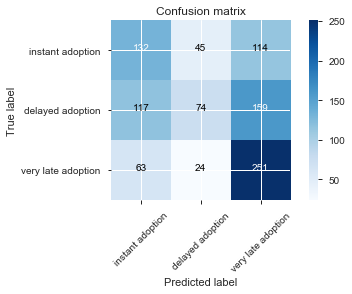

In [48]:
cm = metrics.confusion_matrix(y_test, pred, labels=labels)
plot_confusion_matrix(cm, classes=labels)

### Logistic Regression

In [49]:
# Set the parameters by cross-validation
tuned_parameters = [{'C': 10.0**np.arange(0,7),'penalty':['l2','l1'],'solver':['liblinear','lbfgs']}]

scores = ['accuracy']

for score in scores:
    print("# Tuning hyper-parameters for %s" % score)
    print()

    lr_clf = GridSearchCV(
        LogisticRegression(max_iter= np.ceil(10**6 / X_train.shape[0])), tuned_parameters, cv=5, scoring='%s' % score)
    lr_clf.fit(X_train, y_train)

    print("Best parameters set found on Train set:")
    print()
    print(lr_clf.best_params_)
    print()
    print("Grid scores on Train set:")
    print()
    means = lr_clf.cv_results_['mean_test_score']
    stds = lr_clf.cv_results_['std_test_score']
    for mean, std, params in zip(means, stds, lr_clf.cv_results_['params']):
        print("%0.3f (+/-%0.03f) for %r"
              % (mean, std * 2, params))
    print()

    print("Detailed classification report on Test Set:")
    pred = lr_clf.predict(X_test)
    print(classification_report(y_test, pred,target_names=labels))
    print()

# Tuning hyper-parameters for accuracy

Best parameters set found on Train set:

{'C': 10.0, 'penalty': 'l1', 'solver': 'liblinear'}

Grid scores on Train set:

0.491 (+/-0.040) for {'C': 1.0, 'penalty': 'l2', 'solver': 'liblinear'}
0.495 (+/-0.040) for {'C': 1.0, 'penalty': 'l2', 'solver': 'lbfgs'}
0.490 (+/-0.033) for {'C': 1.0, 'penalty': 'l1', 'solver': 'liblinear'}
nan (+/-nan) for {'C': 1.0, 'penalty': 'l1', 'solver': 'lbfgs'}
0.498 (+/-0.039) for {'C': 10.0, 'penalty': 'l2', 'solver': 'liblinear'}
0.498 (+/-0.038) for {'C': 10.0, 'penalty': 'l2', 'solver': 'lbfgs'}
0.499 (+/-0.038) for {'C': 10.0, 'penalty': 'l1', 'solver': 'liblinear'}
nan (+/-nan) for {'C': 10.0, 'penalty': 'l1', 'solver': 'lbfgs'}
0.497 (+/-0.040) for {'C': 100.0, 'penalty': 'l2', 'solver': 'liblinear'}
0.497 (+/-0.038) for {'C': 100.0, 'penalty': 'l2', 'solver': 'lbfgs'}
0.497 (+/-0.040) for {'C': 100.0, 'penalty': 'l1', 'solver': 'liblinear'}
nan (+/-nan) for {'C': 100.0, 'penalty': 'l1', 'solver': 'lbfgs'}

Confusion matrix, without normalization


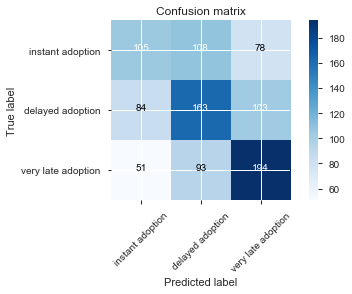

In [50]:
cm = metrics.confusion_matrix(y_test, pred, labels=labels)
plot_confusion_matrix(cm, classes=labels)

### Random Forest Classifier

In [51]:
# Set the parameters by cross-validation
tuned_parameters = [{'n_estimators': [400,500]}]

scores = ['accuracy']

for score in scores:
    print("# Tuning hyper-parameters for %s" % score)
    print()

    rf_clf = GridSearchCV(
        RandomForestClassifier(), tuned_parameters, cv=5, scoring='%s' % score)
    rf_clf.fit(X_train, y_train)

    print("Best parameters set found on Train set:")
    print()
    print(rf_clf.best_params_)
    print()
    print("Grid scores on Train set:")
    print()
    means = rf_clf.cv_results_['mean_test_score']
    stds = rf_clf.cv_results_['std_test_score']
    for mean, std, params in zip(means, stds, rf_clf.cv_results_['params']):
        print("%0.3f (+/-%0.03f) for %r"
              % (mean, std * 2, params))
    print()

    print("Detailed classification report on Test Set:")
    pred = rf_clf.predict(X_test)
    print(classification_report(y_test, pred,target_names=labels))
    print()

# Tuning hyper-parameters for accuracy

Best parameters set found on Train set:

{'n_estimators': 400}

Grid scores on Train set:

0.703 (+/-0.019) for {'n_estimators': 400}
0.701 (+/-0.025) for {'n_estimators': 500}

Detailed classification report on Test Set:
                    precision    recall  f1-score   support

  instant adoption       0.71      0.71      0.71       350
  delayed adoption       0.69      0.66      0.68       291
very late adoption       0.75      0.78      0.76       338

          accuracy                           0.72       979
         macro avg       0.72      0.72      0.72       979
      weighted avg       0.72      0.72      0.72       979




Confusion matrix, without normalization


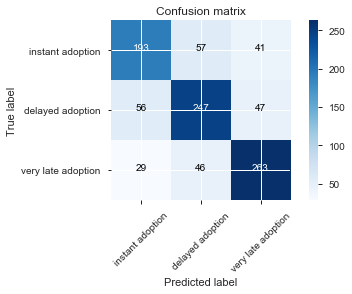

In [52]:
cm = metrics.confusion_matrix(y_test, pred, labels=labels)
plot_confusion_matrix(cm, classes=labels)

### KNN Classifier

In [53]:
# Set the parameters by cross-validation
tuned_parameters = [{'n_neighbors': [5,10,20],'weights':['uniform','distance']}]

scores = ['accuracy']

for score in scores:
    print("# Tuning hyper-parameters for %s" % score)
    print()

    knn_clf = GridSearchCV(
        KNeighborsClassifier(), tuned_parameters, cv=5, scoring='%s' % score)
    knn_clf.fit(X_train, y_train)

    print("Best parameters set found on Train set:")
    print()
    print(knn_clf.best_params_)
    print()
    print("Grid scores on Train set:")
    print()
    means = knn_clf.cv_results_['mean_test_score']
    stds = knn_clf.cv_results_['std_test_score']
    for mean, std, params in zip(means, stds, knn_clf.cv_results_['params']):
        print("%0.3f (+/-%0.03f) for %r"
              % (mean, std * 2, params))
    print()

    print("Detailed classification report on Test Set:")
    pred = knn_clf.predict(X_test)
    print(classification_report(y_test, pred,target_names=labels))
    print()

# Tuning hyper-parameters for accuracy

Best parameters set found on Train set:

{'n_neighbors': 20, 'weights': 'distance'}

Grid scores on Train set:

0.521 (+/-0.036) for {'n_neighbors': 5, 'weights': 'uniform'}
0.650 (+/-0.037) for {'n_neighbors': 5, 'weights': 'distance'}
0.504 (+/-0.032) for {'n_neighbors': 10, 'weights': 'uniform'}
0.658 (+/-0.026) for {'n_neighbors': 10, 'weights': 'distance'}
0.497 (+/-0.032) for {'n_neighbors': 20, 'weights': 'uniform'}
0.658 (+/-0.023) for {'n_neighbors': 20, 'weights': 'distance'}

Detailed classification report on Test Set:
                    precision    recall  f1-score   support

  instant adoption       0.62      0.73      0.67       350
  delayed adoption       0.70      0.54      0.61       291
very late adoption       0.69      0.70      0.70       338

          accuracy                           0.66       979
         macro avg       0.67      0.66      0.66       979
      weighted avg       0.67      0.66      0.66       979




Confusion matrix, without normalization


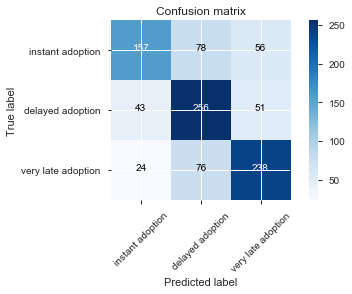

In [54]:
cm = metrics.confusion_matrix(y_test, pred, labels=labels)
plot_confusion_matrix(cm, classes=labels)

### Adaboost Classifier

In [55]:
ada_clf = AdaBoostClassifier(n_estimators=100, random_state=0)

In [56]:
ada_clf.fit(X_train, y_train)
scores = cross_val_score(ada_clf, X_train, y_train, cv=5)
print("Accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))

Accuracy: 0.51 (+/- 0.05)


In [57]:
pred = ada_clf.predict(X_test)
#generate classification report
print(classification_report(y_test, pred, target_names=labels))

                    precision    recall  f1-score   support

  instant adoption       0.51      0.50      0.50       350
  delayed adoption       0.48      0.48      0.48       291
very late adoption       0.58      0.59      0.59       338

          accuracy                           0.53       979
         macro avg       0.52      0.53      0.52       979
      weighted avg       0.53      0.53      0.53       979



Confusion matrix, without normalization


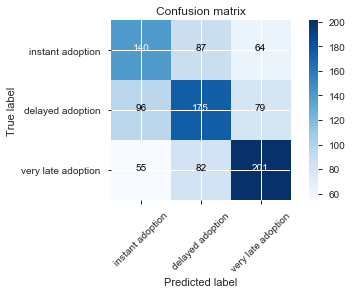

In [58]:
cm = metrics.confusion_matrix(y_test, pred, labels=labels)
plot_confusion_matrix(cm, classes=labels)

### Voting Classifier

In [59]:
eclf = VotingClassifier(estimators=[('onehot-clf1', clf_DTC), ('onehot-clf3', lr_clf) , ('onehot-clf4', rf_clf) , ('onehot-clf5', knn_clf) ,('onehot-clf6', ada_clf)], voting='soft')
eclf.fit(X_train, y_train)
for clf, label in zip([clf_DTC, lr_clf, rf_clf, knn_clf, ada_clf, eclf], ['DecisionTree', 'Logistic Regression', 'Random Forest', 'Knn', 'Adaboost','Voting']):
    scores = cross_val_score(clf, X_test, y_test, scoring='accuracy', cv=5)
    print("Accuracy: %0.2f (+/- %0.2f) [%s]" % (scores.mean(), scores.std(), label))

Accuracy: 0.47 (+/- 0.02) [DecisionTree]
Accuracy: 0.46 (+/- 0.02) [Logistic Regression]
Accuracy: 0.54 (+/- 0.02) [Random Forest]
Accuracy: 0.48 (+/- 0.02) [Knn]
Accuracy: 0.49 (+/- 0.03) [Adaboost]
Accuracy: 0.50 (+/- 0.02) [Voting]


Confusion matrix, without normalization


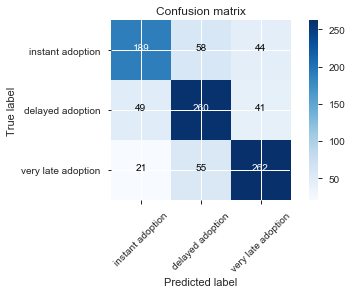

In [60]:
pred=eclf.predict(X_test)
cm = metrics.confusion_matrix(y_test, pred, labels=labels)
plot_confusion_matrix(cm, classes=labels)

## 1.3. Classification - Results and Discussion 

In this task we first divided the data in separate cat class and dog class and then performed multi-class classification on the target variable of AdoptionSpeed.
We have performed complete Exploratory Data Analysis and feature pre-processing to make a good input for ML Algorithm.
We have applied one classifier from each of the category described as well as the cross validation and hyper parameter tuning to get best results out of our Algorithms.